In [1]:
import pandas as pd
import numpy as np

top_num=10

df = pd.read_csv("train.shuf.csv")
df.target.astype(int)
dfs_info = pd.read_csv("songs.csv")
dfu_info = pd.read_csv("members.csv")

In [2]:
# Filter positive
dfp = df

In [3]:
dfp.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,6/7Y2K+7EhwTUG0RGOoYufHSFxITcNzyYZsVkApgbOc=,B7jRsoPrv7gXH8gmHW8COroU+yth+3/nSISvhNfRUbE=,my library,Local playlist more,local-playlist,0
1,DPSsGhn5YHrlbr8gFdOYzRGl6FHECZQIdtjJ4+0c1ac=,yRzIZFM8OnCUrG1UY1WOnA5mkZhmn3YwacNC3e8kVpw=,discover,Discover Feature,song-based-playlist,1
2,h8JJnfV0yW2kOpUjof7+J/liNd6j7LubAnJ/RHe4gaQ=,OS3Xvqxd8XuSIOOy/0tgNq/qWG7CPTJW2TrUxAsOoVU=,explore,Online playlist more,online-playlist,0
3,HVcWdf8CEo9s6qwt5V7TpoPYJfRlQSTA6b7kxEAImpc=,cqtLiwHhAtaYph4nHSiPDvCWEP+ADwh6N++Hv/ZaXVI=,discover,Online playlist more,online-playlist,0
4,FQEYdIHYgqdZJmAZYkf3Hu2FXWX1bnRSckUYa2y6nPY=,CxBBuUfRpRSeDgayHjn/bfoqJw20fqX000kJ65txx3c=,my library,Local playlist more,local-library,1


In [4]:
dfs_info.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [5]:
dfs_info['artist_name'] = dfs_info['artist_name'].apply(lambda x: str(x).strip('|').split('|'))

In [6]:
dfs_info.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,[張信哲 (Jeff Chang)],董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,[BLACKPINK],TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,[SUPER JUNIOR],NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,[S.H.E],湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,[貴族精選],Traditional,Traditional,52.0


In [7]:
df_context = pd.merge(dfp, dfs_info, on='song_id', how='left')

In [8]:
df_context_explode = df_context.explode('artist_name')

In [9]:
artist_counts = df_context_explode['artist_name'].value_counts()

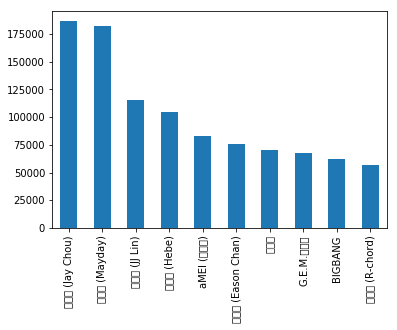

In [10]:
artist_counts[1:11].plot(kind='bar')

In [11]:
artist_counts[1:11].sum()

1004677

In [12]:
myfilter = artist_counts[1:11].index
myfilter

Index(['周杰倫 (Jay Chou)', '五月天 (Mayday)', '林俊傑 (JJ Lin)', '田馥甄 (Hebe)',
       'aMEI (張惠妹)', '陳奕迅 (Eason Chan)', '玖壹壹', 'G.E.M.鄧紫棋', 'BIGBANG',
       '謝和弦 (R-chord)'],
      dtype='object')

In [13]:
dfs_info_explode = dfs_info.explode('artist_name')

In [14]:
dfs_info_filter = dfs_info_explode[ dfs_info_explode.artist_name.isin(myfilter) ]

In [15]:
dfs_info_filter.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
17,OcG4Ya7iXmVMCMy24C5wxDMtr9w6WQZiFaN0uq6zdTk=,169430,465,BIGBANG,TAEYANG| TEDDY,G-DRAGON| T.O.P| TEDDY,3.0
29,gG3/58uZyyOwaPT+eGWL81mwCzcDPW2EmwYcjWmvJSs=,226742,465,五月天 (Mayday),阿信,阿信,3.0
62,v91olyybN9ksMslVNo8ZdbOwj/gtBv4VzK35LEk0B/M=,253492,465,周杰倫 (Jay Chou),周杰倫,方文山,3.0
182,ou1wRtH/HtUshJxLUuNcJwRvN5X6nYuWAfZ6rdhGB8I=,166661,458,周杰倫 (Jay Chou),周杰倫,方文山,3.0


In [16]:
item = dfs_info_filter[ ['genre_ids', 'artist_name' ] ]

In [17]:
item.head()

,genre_ids,artist_name
8,465,林俊傑 (JJ Lin)
17,465,BIGBANG
29,465,五月天 (Mayday)
62,465,周杰倫 (Jay Chou)
182,458,周杰倫 (Jay Chou)


In [18]:
item['genre_ids'] = item['genre_ids'].apply( lambda x : str(x).split('|'))

/home/johncreed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
item = item.explode('genre_ids')

In [20]:
genre_gby = item.groupby('artist_name')['genre_ids'].apply(list)

In [21]:
item = genre_gby.reset_index()

In [22]:
def merge(mylist):
    return "|".join(mylist)

item['genre_ids'] = item['genre_ids'].apply(set)
item['genre_ids'] = item['genre_ids'].apply(merge)

In [23]:
item.to_csv("item.csv", index = False)

In [24]:
item.head()

,artist_name,genre_ids
0,BIGBANG,465|1259|444|2022
1,G.E.M.鄧紫棋,1609|1568|1259|139|125|1633|nan|94|109|430|359...
2,aMEI (張惠妹),465|458
3,五月天 (Mayday),465|458|921|nan
4,周杰倫 (Jay Chou),1605|465|458


In [25]:
item_label = item.reset_index()
item_label = item_label.rename(columns={'index': 'label'}).drop(columns=['genre_ids'])

In [26]:
item_label.head()

,label,artist_name
0,0,BIGBANG
1,1,G.E.M.鄧紫棋
2,2,aMEI (張惠妹)
3,3,五月天 (Mayday)
4,4,周杰倫 (Jay Chou)


In [27]:
df_context_filter = df_context_explode[ df_context_explode['artist_name'].isin(myfilter) ]
df_context_filter.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
36,S1biRHcv+ApiQ+8eA0x+erF6054pSTxMFUlAwdC/fw0=,eX+ylks3nC1gGXSzjifjryztRDMojjOnO582wwITh6Y=,my library,Local playlist more,local-library,1,255895.0,465,林俊傑 (JJ Lin),林俊傑,張思爾,3.0
46,mczw6Wx2iwLBZ3Bwaye1erB5s/escGJPeGIF6A1bffg=,M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=,my library,Local playlist more,local-playlist,1,265848.0,465,林俊傑 (JJ Lin),JJ Lin,Lin Qiu Li,3.0
51,6zM93SmkP6gz8/tvB4kl+84caBC2qlONk/qny6q5ooY=,OakhL7CLirelAGEP9sYyP6fmTa8HV1mD/qVdpM6o5uE=,discover,Discover Chart,online-playlist,0,258821.0,NaN,G.E.M.鄧紫棋,NaN,NaN,3.0
60,6kjKB8hDbQjsdMdjWpY9hNeoMtxp/YwS9/8mZG7QLzY=,msy6vSQ15p6RVJfm/bSgcDwd3YSLp445Pdhzw6CEZRM=,my library,Local playlist more,local-playlist,0,194168.0,465,謝和弦 (R-chord),R-chord,R-chord,3.0
61,vz2ep7k8A4BOiIuGZwpieHFbxMOysryqcZFNNfzvRoc=,gejw+3WlC2cQOxQNuDgKdFUxlI/Oh2p2SHlATx9XI4o=,my library,Local playlist more,local-playlist,1,169456.0,465,BIGBANG,NaN,NaN,31.0


In [28]:
df_context_filter = pd.merge(df_context_filter, item_label, on='artist_name', how='left')
df_context_filter.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,label
0,S1biRHcv+ApiQ+8eA0x+erF6054pSTxMFUlAwdC/fw0=,eX+ylks3nC1gGXSzjifjryztRDMojjOnO582wwITh6Y=,my library,Local playlist more,local-library,1,255895.0,465,林俊傑 (JJ Lin),林俊傑,張思爾,3.0,5
1,mczw6Wx2iwLBZ3Bwaye1erB5s/escGJPeGIF6A1bffg=,M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=,my library,Local playlist more,local-playlist,1,265848.0,465,林俊傑 (JJ Lin),JJ Lin,Lin Qiu Li,3.0,5
2,6zM93SmkP6gz8/tvB4kl+84caBC2qlONk/qny6q5ooY=,OakhL7CLirelAGEP9sYyP6fmTa8HV1mD/qVdpM6o5uE=,discover,Discover Chart,online-playlist,0,258821.0,NaN,G.E.M.鄧紫棋,NaN,NaN,3.0,1
3,6kjKB8hDbQjsdMdjWpY9hNeoMtxp/YwS9/8mZG7QLzY=,msy6vSQ15p6RVJfm/bSgcDwd3YSLp445Pdhzw6CEZRM=,my library,Local playlist more,local-playlist,0,194168.0,465,謝和弦 (R-chord),R-chord,R-chord,3.0,8
4,vz2ep7k8A4BOiIuGZwpieHFbxMOysryqcZFNNfzvRoc=,gejw+3WlC2cQOxQNuDgKdFUxlI/Oh2p2SHlATx9XI4o=,my library,Local playlist more,local-playlist,1,169456.0,465,BIGBANG,NaN,NaN,31.0,0


In [29]:
context = df_context_filter.drop(columns=['artist_name', 'composer', 'song_length', 'genre_ids', 'language', 'lyricist', 'target'])
context.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,label
0,S1biRHcv+ApiQ+8eA0x+erF6054pSTxMFUlAwdC/fw0=,eX+ylks3nC1gGXSzjifjryztRDMojjOnO582wwITh6Y=,my library,Local playlist more,local-library,5
1,mczw6Wx2iwLBZ3Bwaye1erB5s/escGJPeGIF6A1bffg=,M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=,my library,Local playlist more,local-playlist,5
2,6zM93SmkP6gz8/tvB4kl+84caBC2qlONk/qny6q5ooY=,OakhL7CLirelAGEP9sYyP6fmTa8HV1mD/qVdpM6o5uE=,discover,Discover Chart,online-playlist,1
3,6kjKB8hDbQjsdMdjWpY9hNeoMtxp/YwS9/8mZG7QLzY=,msy6vSQ15p6RVJfm/bSgcDwd3YSLp445Pdhzw6CEZRM=,my library,Local playlist more,local-playlist,8
4,vz2ep7k8A4BOiIuGZwpieHFbxMOysryqcZFNNfzvRoc=,gejw+3WlC2cQOxQNuDgKdFUxlI/Oh2p2SHlATx9XI4o=,my library,Local playlist more,local-playlist,0


In [30]:
dset = {}
context['his'] = np.nan
context['his'] = context.his.apply(str)
for i, row in context.iterrows():
    user_id = row['msno']
    song_id = str(row['song_id'])
    if user_id in dset:
        context.set_value(i, 'his', '|'.join(dset[user_id][-50:]))
        dset[user_id].append(song_id)
    else:
        dset[user_id] = [song_id]
    if i % 100000 == 0:
        print(i)

0


/home/johncreed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


In [31]:
context.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,label,his
1004672,ZiwP16ZunIGtkzDalZSrNydpmF7xhaK/BOaEU1W8hzg=,Frmk11gW4MCBMFI29JvP2E+gAQBzSUKvSuePz9ZYlnc=,my library,Local playlist more,local-library,9,KY0IEX2Wh4crmn9OhMKpq8m1uDScBYekm8oyGAB1P2A=|b...
1004673,+06pc1V8QfywrGOTNln/7X7Md8dA8fVOIU37n2M5mv8=,DvHbbKq6SoKKt5aWob2nT2K+nfqOzGqDUi03+yndEQE=,discover,Album more,album,2,IXP1a2o3NL8WU4WK1X0WJAKaSW+LgGRpPDn4Gt1HrV8=|9...
1004674,VV9eAuOm+6wvYuj0xQIrAkZiOe8GlRZIze1CL8/asoY=,eBme/h4Z4eP7BZY3tifu5Lr/dRB9NQJVIl36jZ5DZGQ=,discover,Online playlist more,online-playlist,8,JTMsJNPcL2ambkp1Z/MeBEnFEzZEOKetdLPrJxHf7v8=|S...
1004675,EV+haqw1v8W3llQyva2hU+zvf+hCIKNDfTuoTeyUkmE=,kwBGejgkuNTxBXSRSx5612K8pfr70haWIafI+DX6WP4=,my library,Local playlist more,local-playlist,3,nnGh305rOmte1K/4D+qsL1LyY6P+jvDlzATIqwbCa/0=|b...
1004676,MVYNEp+CbK+6TLZwHl2IcVYfrkedOHpyopWh8ceMcoY=,jBZBYugMwHamJngPoHs9LA2Aw0wxRYjZGux/dvYe5EU=,discover,Online playlist more,online-playlist,4,ZefMXvbt+Ry+HGgmN8r9hLkZYLJuht7DiAAZveWCIFk=|/...


In [32]:
context = pd.merge(context, dfu_info, on='msno', how='left')
context.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,label,his,city,bd,gender,registered_via,registration_init_time,expiration_date
0,S1biRHcv+ApiQ+8eA0x+erF6054pSTxMFUlAwdC/fw0=,eX+ylks3nC1gGXSzjifjryztRDMojjOnO582wwITh6Y=,my library,Local playlist more,local-library,5,nan,15,22,male,9,20070827,20171001
1,mczw6Wx2iwLBZ3Bwaye1erB5s/escGJPeGIF6A1bffg=,M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=,my library,Local playlist more,local-playlist,5,nan,13,32,male,7,20160423,20170813
2,6zM93SmkP6gz8/tvB4kl+84caBC2qlONk/qny6q5ooY=,OakhL7CLirelAGEP9sYyP6fmTa8HV1mD/qVdpM6o5uE=,discover,Discover Chart,online-playlist,1,nan,1,0,NaN,7,20160818,20170917
3,6kjKB8hDbQjsdMdjWpY9hNeoMtxp/YwS9/8mZG7QLzY=,msy6vSQ15p6RVJfm/bSgcDwd3YSLp445Pdhzw6CEZRM=,my library,Local playlist more,local-playlist,8,nan,1,0,NaN,7,20150911,20170914
4,vz2ep7k8A4BOiIuGZwpieHFbxMOysryqcZFNNfzvRoc=,gejw+3WlC2cQOxQNuDgKdFUxlI/Oh2p2SHlATx9XI4o=,my library,Local playlist more,local-playlist,0,nan,22,29,female,9,20060527,20170921


In [33]:
context = context.drop(columns=['registered_via', 'registration_init_time', 'expiration_date', 'bd'])
context.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,label,his,city,gender
0,S1biRHcv+ApiQ+8eA0x+erF6054pSTxMFUlAwdC/fw0=,eX+ylks3nC1gGXSzjifjryztRDMojjOnO582wwITh6Y=,my library,Local playlist more,local-library,5,nan,15,male
1,mczw6Wx2iwLBZ3Bwaye1erB5s/escGJPeGIF6A1bffg=,M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=,my library,Local playlist more,local-playlist,5,nan,13,male
2,6zM93SmkP6gz8/tvB4kl+84caBC2qlONk/qny6q5ooY=,OakhL7CLirelAGEP9sYyP6fmTa8HV1mD/qVdpM6o5uE=,discover,Discover Chart,online-playlist,1,nan,1,NaN
3,6kjKB8hDbQjsdMdjWpY9hNeoMtxp/YwS9/8mZG7QLzY=,msy6vSQ15p6RVJfm/bSgcDwd3YSLp445Pdhzw6CEZRM=,my library,Local playlist more,local-playlist,8,nan,1,NaN
4,vz2ep7k8A4BOiIuGZwpieHFbxMOysryqcZFNNfzvRoc=,gejw+3WlC2cQOxQNuDgKdFUxlI/Oh2p2SHlATx9XI4o=,my library,Local playlist more,local-playlist,0,nan,22,female


In [34]:
context.to_csv("context.csv", index = False)